In [24]:
import numpy as np # primary math library
import matplotlib.pyplot as plt # primary plotting library
%matplotlib inline

import nelpy as nel # should be installed using pip install nelpy

import warnings
warnings.filterwarnings("ignore") # useful to prevent excess nelpy warnings

In [2]:
# dataroot = '/Users/ckemere/Development/Data/Frank/';
dataroot = '/home/kemerelab/Data/Frank/'

In [3]:
import os

filename = os.path.join(dataroot,'FrankLabData.nel')
import pandas as pd
import nelpy.io
jar = nel.load_pkl(filename)

data = jar.data
tetinfo = jar.tetinfo
cellinfo = jar.cellinfo
taskinfo = jar.taskinfo
del jar


In [4]:
novel_epochs = [1,3] # True for Frank, Conley, and Bond
familiar_epochs = 5

use_novel = True

epochs = []
if use_novel:
    epochs = epochs + novel_epochs
else:
    epochs = epochs + familiar_epochs

# Plot all novel sessions (Note frank is missing one pre-sleep)

In [21]:
list(data['Bon'][3]['task_metadata'].query('type=="run" & environment=="TrackB"')['Epoch'])

[1, 3]

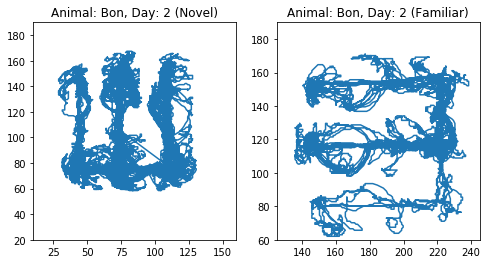

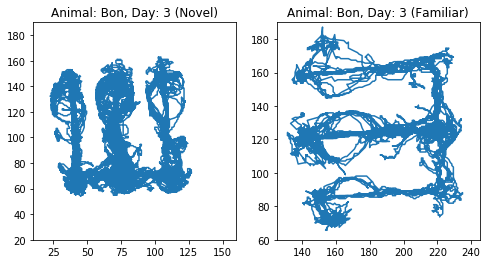

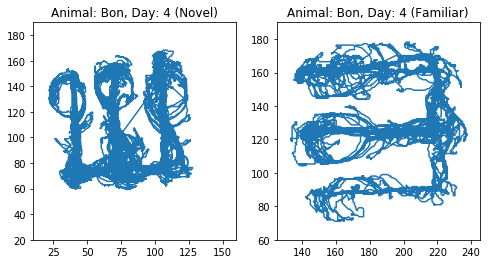

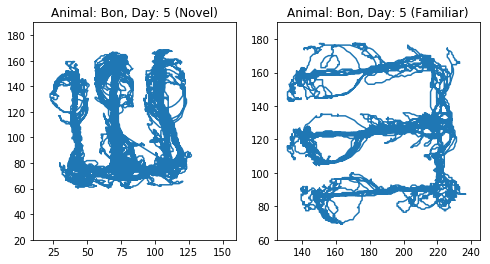

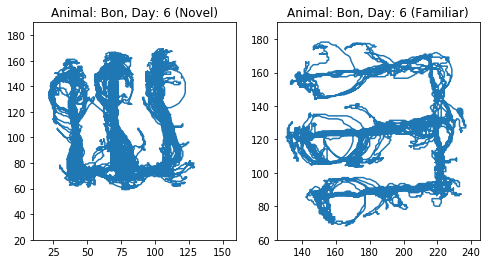

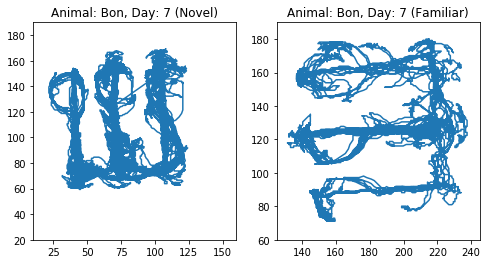

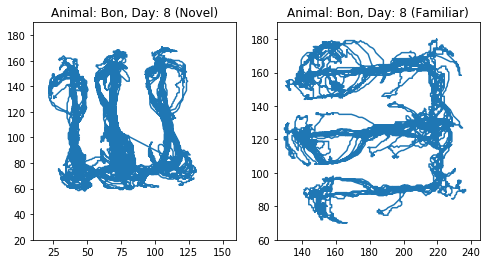

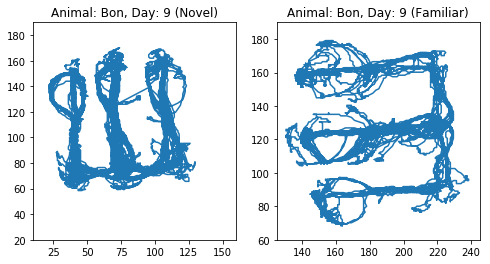

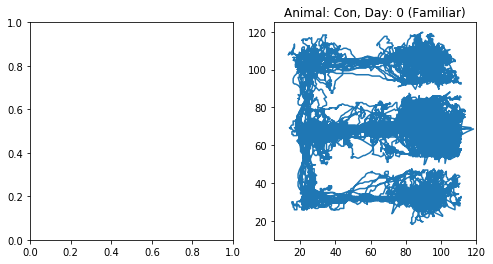

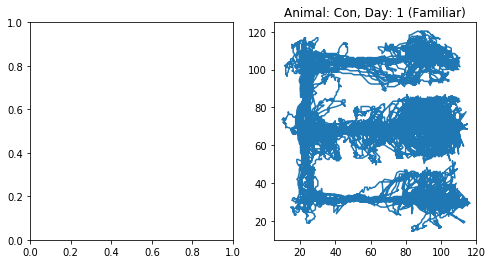

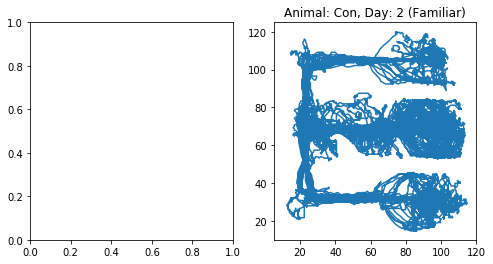

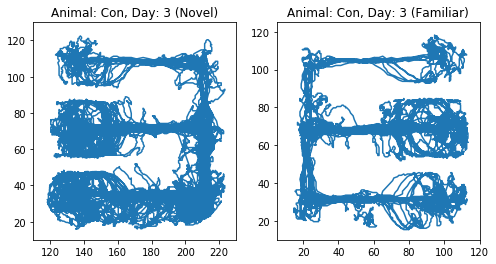

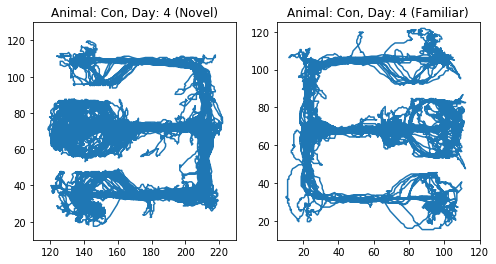

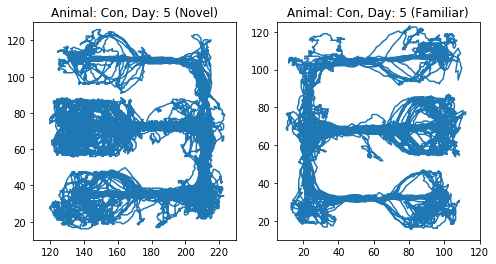

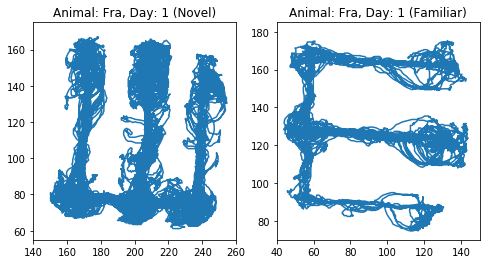

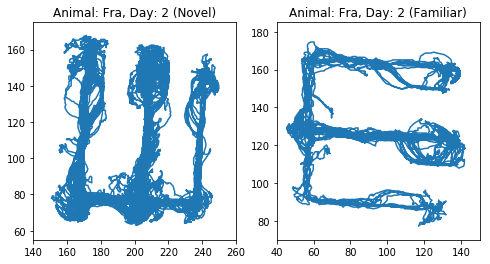

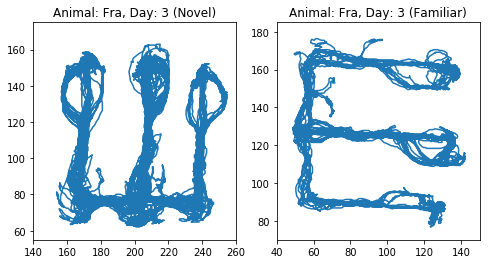

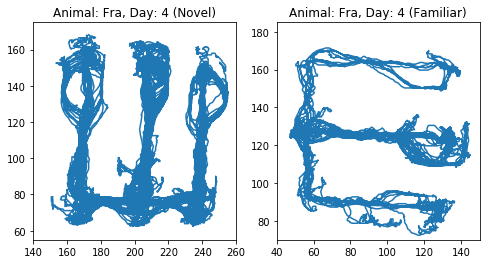

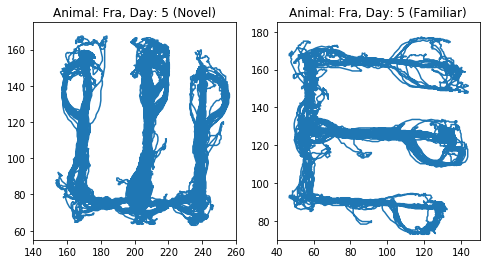

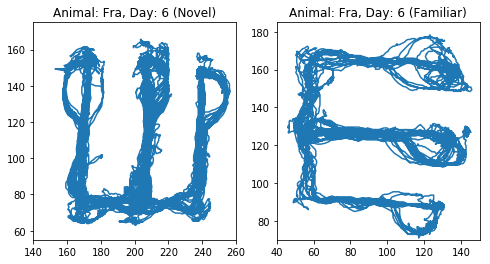

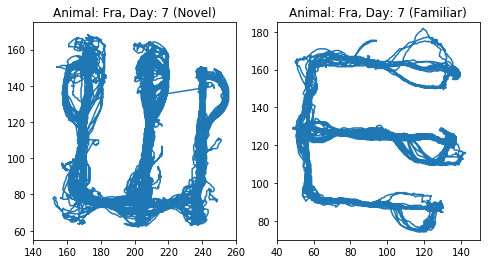

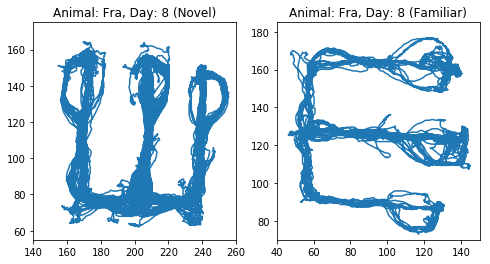

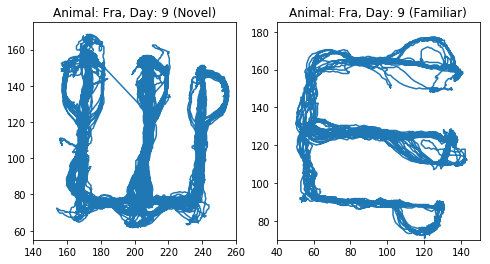

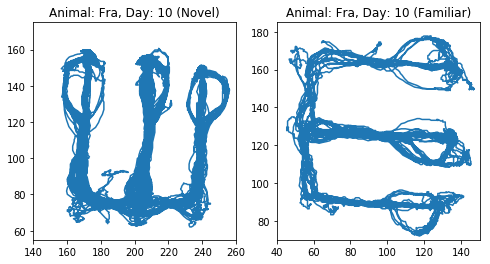

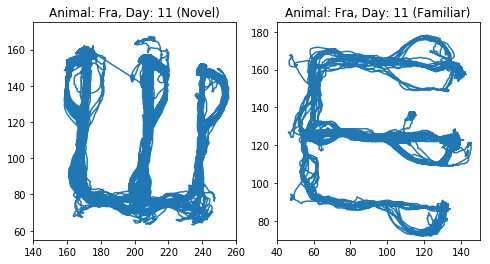

In [32]:

for anim, animdata in data.items():
    for day, daydata in animdata.items():
    
        novel_epochs = list(data[anim][day]['task_metadata'].query('type=="run" & environment=="TrackB"')['Epoch'])
        familiar_epochs = list(data[anim][day]['task_metadata'].query('type=="run" & environment=="TrackA"')['Epoch'])

        if (anim=='Fra') & (day==3):
            novel_epochs = [e-1 for e in novel_epochs]
            familiar_epochs = [e-1 for e in familiar_epochs]
            
        pos = daydata['pos']
        
        fig, ax = plt.subplots(1,2, figsize=(8,4))

        # Novel Epochs
        if len(novel_epochs) > 0:
            # Bins for tuning curves
            if (anim == 'Bon'):
                x_extents = [10,160] # Read these off of maze figure above
                y_extents = [20,190]
            elif (anim == 'Con'):
                x_extents = [110,230] # Read these off of maze figure above
                y_extents = [10,130]
            elif (anim == 'Fra'):
                x_extents = [140,260] # Read these off of maze figure above
                y_extents = [55,175]

            x, y = pos[novel_epochs,:].asarray().yvals
            ax[0].plot(x,y)
            ax[0].set_xlim(*x_extents)
            ax[0].set_ylim(*y_extents)
            title = 'Animal: {}, Day: {} (Novel)'.format(anim, day)
            ax[0].set_title(title)
            
        if len(familiar_epochs) > 0:
            # Bins for tuning curves
            if (anim == 'Bon'):
                x_extents = [125,245] # Read these off of maze figure above
                y_extents = [60,190]
            elif (anim == 'Con'):
                x_extents = [5,120] # Read these off of maze figure above
                y_extents = [10,125]
            elif (anim == 'Fra'):
                x_extents = [40,150] # Read these off of maze figure above
                y_extents = [70,185]

            x, y = pos[familiar_epochs,:].asarray().yvals
            ax[1].plot(x,y)
            ax[1].set_xlim(*x_extents)
            ax[1].set_ylim(*y_extents)
            title = 'Animal: {}, Day: {} (Familiar)'.format(anim, day)
            ax[1].set_title(title)


In [34]:
XMazeExtents = {}
YMazeExtents = {}

XMazeExtents['Bon'] = {}
YMazeExtents['Bon'] = {}
XMazeExtents['Bon']['Novel'] = [10,160]
YMazeExtents['Bon']['Novel'] = [20,190]
XMazeExtents['Bon']['Familiar'] = [125,245]
YMazeExtents['Bon']['Familiar'] = [60,190]

XMazeExtents['Con'] = {}
YMazeExtents['Con'] = {}
XMazeExtents['Con']['Novel'] = [110,230]
YMazeExtents['Con']['Novel'] = [10,130]
XMazeExtents['Con']['Familiar'] = [5,120]
YMazeExtents['Con']['Familiar'] = [10,125]

XMazeExtents['Fra'] = {}
YMazeExtents['Fra'] = {}
XMazeExtents['Fra']['Novel'] = [140,260]
YMazeExtents['Fra']['Novel'] = [55,175]
XMazeExtents['Fra']['Familiar'] = [40,150]
YMazeExtents['Fra']['Familiar'] = [70,185]



/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal outside of support
/home/kemerelab/Code/nelpy/nelpy/core/_analogsignalarray.py:560: UserWarning: ignoring signal ou

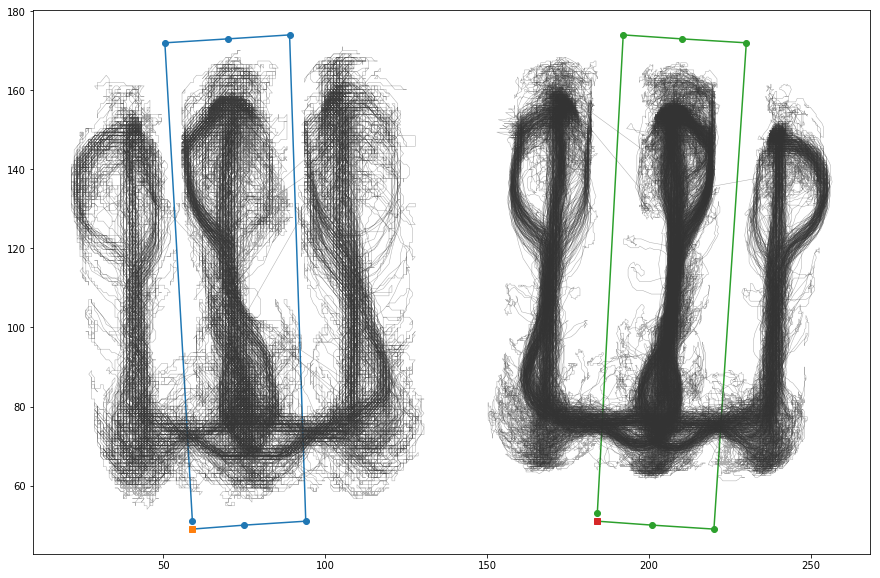

In [14]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
NovelCenterBounds = {}

BonCenterNovel = np.array([
    [  59,   49],
    [  75,   50],
    [  94,   51],
    [  89,  174],
    [  70,  173],
    [  50.5,  172],
    [  59,   51],
])
NovelCenterBounds['Bon'] = BonCenterNovel


ConCenterNovel = np.array([
    [230, 52],
    [230, 71],
    [230, 90],
    [100, 92],
    [100, 72],
    [100,51],
    [225,52],
])

NovelCenterBounds['Con'] = ConCenterNovel

FraCenterNovel = np.array([
    [184, 51],
    [201, 50],
    [220, 49],
    [230, 172],
    [210, 173],
    [192, 174],
    [184, 53],
])
NovelCenterBounds['Fra'] = FraCenterNovel


plt.plot(NovelCenterBounds['Bon'][:,0], NovelCenterBounds['Bon'][:,1],'o-')
plt.plot(NovelCenterBounds['Bon'][0,0], NovelCenterBounds['Bon'][0,1],'s-')

plt.plot(NovelCenterBounds['Fra'][:,0], NovelCenterBounds['Fra'][:,1],'o-')
plt.plot(NovelCenterBounds['Fra'][0,0], NovelCenterBounds['Fra'][0,1],'s-')


for day, daydata in data['Fra'].items():
    pos = daydata['pos']
    if (day != 3):
        epochs = [1,3]
    else:
        epochs = [0,2]
    x,y = pos[epochs,:].asarray().yvals
    plt.plot(x, y, lw=0.5, c='0.2', alpha=0.4)

if 0:
    pos = data['Con'][4]['pos']
    x,y = pos[[1,3],:].asarray().yvals
    plt.plot(x, y, lw=0.5, c='0.2', alpha=0.4)

for day, daydata in data['Bon'].items():
    pos = daydata['pos']    
    x,y = pos[[1,3],:].asarray().yvals
    plt.plot(x, y, lw=0.5, c='0.2', alpha=0.4)



In [35]:
import nelpy.io
NovelCenterBounds = nel.ResultsContainer(NovelCenterBounds=NovelCenterBounds,
                                         XMazeExtents=XMazeExtents,
                                         YMazeExtents=YMazeExtents,
                                    description='Hand tuned arm bounds.\n')

In [16]:
NovelCenterBounds.save_pkl('NovelCenterBounds.nel')